# Import Libraries

In [ ]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

# initializing the pca
from sklearn.decomposition import PCA

import seaborn as sns; sns.set()

In [ ]:
# load the heart dataset
Heartdata=pd.read_csv('/content/Heart.csv')
Heartdata.head()

,Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0
1,2,67,1,2,160,286,0,2,108,1,1.5,2,3,1,1
2,3,67,1,2,120,229,0,2,129,1,2.6,2,2,2,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,1,0
4,5,41,0,0,130,204,0,2,172,0,1.4,1,0,1,0


t-SNE is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.001s...
[t-SNE] Computed neighbors for 303 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 31.643812
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.202866
[t-SNE] KL divergence after 1000 iterations: 0.497612


[Text(0.5, 1.0, 'Heart data T-SNE projection')]

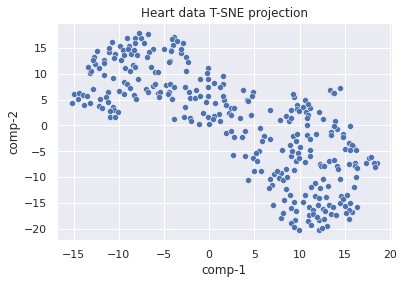

In [ ]:
# run tsne on heart data and display the results
# tsne calculates the probability of similarity of points in high-dimensional space and calculates the probability of similarity of points in the corresponding low-dimensional space
# The similarity of points is calculated as the conditional probability, then tries to minimize the difference between these conditional probabilities (or similarities) in higher-dimensional and lower-dimensional space 
# for a perfect representation of data points in lower-dimensional space.
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(Heartdata)
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", palette=sns.color_palette("hls", 10),data=df).set(title="Heart data T-SNE projection")

# Apply PCA

It performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. It does so by calculating the eigenvectors from the covariance matrix. Also PCA combines the input features in a specific way that can drop the least important feature while still retaining the most valuable parts of all of the features. As an added benefit, each of the new features or components created after PCA are all independent of one another.

In [ ]:
# 15 -> the number of principal components to generate 
pca = PCA(n_components=3)
pca.fit(Heartdata)
print(f'Total number of components used after PCA : {pca.n_components_}')

Total number of components used after PCA : 3


train_img shape : (303, 3)


[Text(0.5, 1.0, 'Heart data PCA projection')]

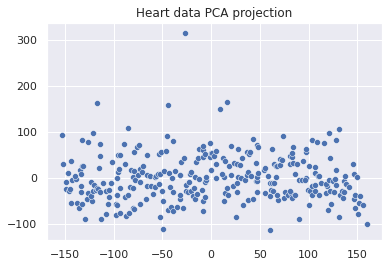

In [ ]:
train_img = pca.transform(Heartdata)
print(f'train_img shape : {train_img.shape}')

# Plot a scatter plot of the PCA components
sns.scatterplot(x=train_img[:,0], y=train_img[:,1], palette=sns.color_palette("hls", 10), data=train_img).set(title="Heart data PCA projection")

the output of tsne on the original data was diverged and with high dimensionality, but when we have done the pca on the data it reduces the dimensions.

# Apply t-SNE on the PCA components

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.001s...
[t-SNE] Computed neighbors for 303 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 31.643812
[t-SNE] KL divergence after 250 iterations with early exaggeration: 113.435806
[t-SNE] KL divergence after 1000 iterations: 1.761558


[Text(0.5, 1.0, 'Heart data T-SNE\xa0projection')]

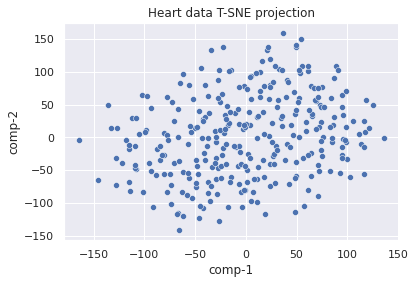

In [ ]:
# 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree
tsne = TSNE(n_components=pca.n_components, verbose=1, random_state=123)
z = tsne.fit_transform(Heartdata)
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", palette=sns.color_palette("hls", 10), data=df).set(title="Heart data T-SNE projection")

The conclusion is t-SNE is computationally expensive and can take several hours on million-sample datasets where PCA will finish in seconds or minutes.

# Clustering by K-means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(Heartdata)
y_kmeans = kmeans.predict(Heartdata)

we use cluster k=2 to avoid overlapping because when we used n>2 there was overlapping between points

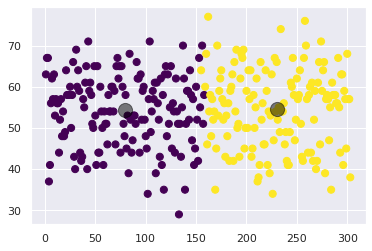

In [ ]:
plt.scatter(Heartdata.iloc[:, 0].values, Heartdata.iloc[:, 1].values, c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

The disadvantages of k-means is that we choose the k manually, clustering data of varying sizes and density, and clustering outliers.


In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X.iloc[:, 0].values, X.iloc[:, 1].values, c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

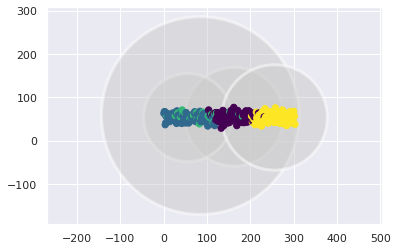

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, Heartdata)

we concluded from this part that there is overlapping and this part isn't good to cluster our data
